1. Підготовка середовища

Спершу потрібно встановити необхідні бібліотеки:

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

2. Ознайомлення з даними:

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Завантажуємо набір даних Titanic
titanic = sns.load_dataset('titanic')

# Виводимо перші 10 рядків набору даних
display(titanic.head(10))  

# Базова статистика за допомогою методу describe()

display(titanic.describe())

# Пропущені значення

missing_values = titanic.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values'] 
display(missing_values)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Column,Missing Values
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


3. Попередня обробка даних:

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

# Завантажуємо набір даних Titanic
titanic = sns.load_dataset('titanic')

# Обробка пропущених значень
# Заповнюємо пропуски у змінній Age середнім значенням
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

# Заповнюємо пропуски у змінній Embarked модою
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Закодуємо категоріальні змінні за допомогою One-Hot Encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

# Створимо нову ознаку FamilySize
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']

# Виведемо оновлений набір даних
display(titanic.head(10))


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,FamilySize
0,0,3,22.000000,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True,1
1,1,1,38.000000,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False,1
2,1,3,26.000000,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True,0
3,1,1,35.000000,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True,1
4,0,3,35.000000,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True,0
5,0,3,29.699118,0,0,8.4583,Third,man,True,NaN,Queenstown,no,True,True,True,False,0
6,0,1,54.000000,0,0,51.8625,First,man,True,E,Southampton,no,True,True,False,True,0
7,0,3,2.000000,3,1,21.0750,Third,child,False,NaN,Southampton,no,False,True,False,True,4
8,1,3,27.000000,0,2,11.1333,Third,woman,False,NaN,Southampton,yes,False,False,False,True,2
9,1,2,14.000000,1,0,30.0708,Second,child,False,NaN,Cherbourg,yes,False,False,False,False,1


4. Поділ даних на тренувальну та тестову вибірки:

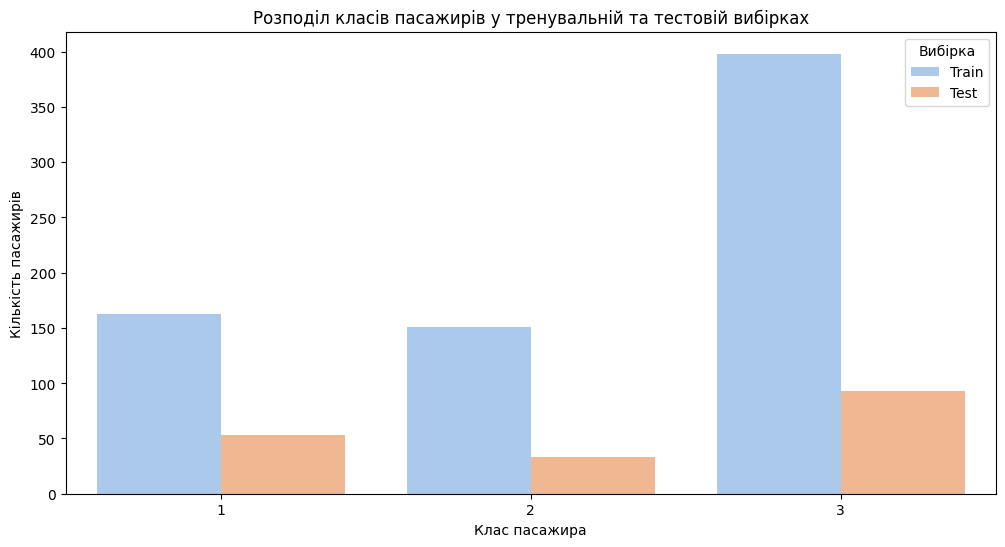

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Завантажуємо набір даних Titanic
titanic = sns.load_dataset('titanic')

# Обробка пропущених значень
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']

# Визначаємо незалежні та залежні змінні
X = titanic.drop(columns=['survived'])  # Незалежні змінні
y = titanic['survived']  # Залежна змінна

# Розділяємо дані на тренувальну та тестову вибірки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Додаємо інформацію про вибірки до нового DataFrame
train_df = X_train.copy()
train_df['survived'] = y_train
train_df['dataset'] = 'Train'

test_df = X_test.copy()
test_df['survived'] = y_test
test_df['dataset'] = 'Test'

# Об'єднуємо дані для візуалізації
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Візуалізація
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='pclass', hue='dataset', palette='pastel')
plt.title('Розподіл класів пасажирів у тренувальній та тестовій вибірках')
plt.xlabel('Клас пасажира')
plt.ylabel('Кількість пасажирів')
plt.legend(title='Вибірка', loc='upper right')
plt.show()



5. Побудова моделей:

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the Titanic dataset
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(columns=['class', 'who', 'deck', 'embark_town', 'alive', 'sex'], errors='ignore')
titanic = titanic.dropna()

# Convert categorical variables to dummy variables
titanic_encoded = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

# Define features and target variable
X = titanic_encoded.drop(columns=["survived"])
y = titanic_encoded["survived"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model_logistic = LogisticRegression(random_state=42, max_iter=1500)
model_tree = DecisionTreeClassifier(random_state=42)
model_forest = RandomForestClassifier(random_state=42)

# Train models
model_logistic.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_forest.fit(X_train, y_train)

# Predict on the test set
y_logistic_pred = model_logistic.predict(X_test)
y_tree_pred = model_tree.predict(X_test)
y_forest_pred = model_forest.predict(X_test)

# Function to evaluate model metrics
def evaluate_metrics(model_name, y_test, y_pred):
    print(f"\n--- {model_name} ---")
    print("Точність (Accuracy):", accuracy_score(y_test, y_pred))
    print("Точність (Precision):", precision_score(y_test, y_pred))
    print("Відклик (Recall):", recall_score(y_test, y_pred))
    print("F1-міра (F1-score):", f1_score(y_test, y_pred))

# Evaluate each model's metrics
evaluate_metrics("Логістична регресія", y_test, y_logistic_pred)
evaluate_metrics("Дерево рішень", y_test, y_tree_pred)
evaluate_metrics("Випадковий ліс", y_test, y_forest_pred)





--- Логістична регресія ---
Точність (Accuracy): 0.8041958041958042
Точність (Precision): 0.8070175438596491
Відклик (Recall): 0.7301587301587301
F1-міра (F1-score): 0.7666666666666667

--- Дерево рішень ---
Точність (Accuracy): 0.6993006993006993
Точність (Precision): 0.6851851851851852
Відклик (Recall): 0.5873015873015873
F1-міра (F1-score): 0.6324786324786325

--- Випадковий ліс ---
Точність (Accuracy): 0.7692307692307693
Точність (Precision): 0.75
Відклик (Recall): 0.7142857142857143
F1-міра (F1-score): 0.7317073170731707


6. Оцінка результатів:


--- Логістична регресія ---
Матриця плутанини:
 [[69 11]
 [17 46]]

Звіт класифікації:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        80
           1       0.81      0.73      0.77        63

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143



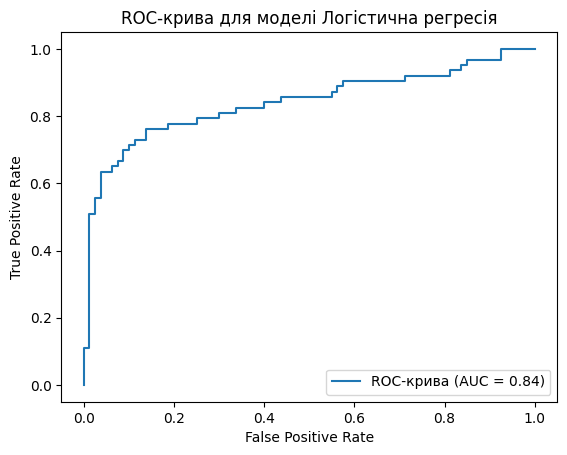


--- Дерево рішень ---
Матриця плутанини:
 [[63 17]
 [26 37]]

Звіт класифікації:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        80
           1       0.69      0.59      0.63        63

    accuracy                           0.70       143
   macro avg       0.70      0.69      0.69       143
weighted avg       0.70      0.70      0.70       143



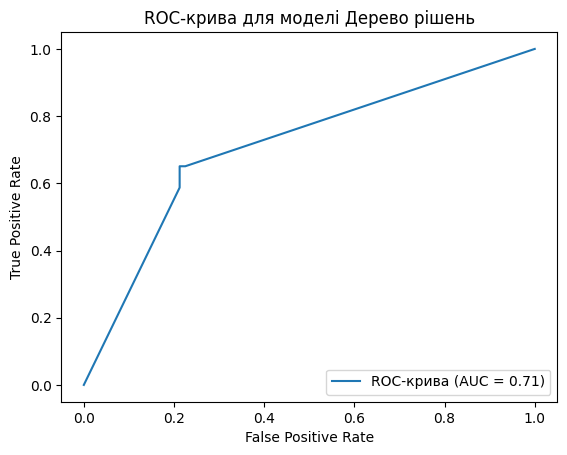


--- Випадковий ліс ---
Матриця плутанини:
 [[65 15]
 [18 45]]

Звіт класифікації:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        80
           1       0.75      0.71      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



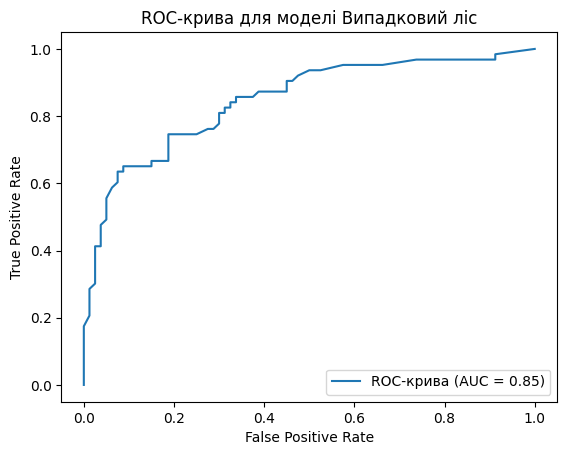

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Predict probabilities for ROC curves
y_logistic_proba = model_logistic.predict_proba(X_test)[:, 1]
y_tree_proba = model_tree.predict_proba(X_test)[:, 1]
y_forest_proba = model_forest.predict_proba(X_test)[:, 1]

# Function to display confusion matrix, ROC curve, and AUC
def evaluate_results(model_name, y_test, y_pred, y_proba):
    print(f"\n--- {model_name} ---")
    print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
    print("\nЗвіт класифікації:\n", classification_report(y_test, y_pred))
    
    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC-крива (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-крива для моделі {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Display results for each model
evaluate_results("Логістична регресія", y_test, y_logistic_pred, y_logistic_proba)
evaluate_results("Дерево рішень", y_test, y_tree_pred, y_tree_proba)
evaluate_results("Випадковий ліс", y_test, y_forest_pred, y_forest_proba)


7. Оптимізація моделі:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model_logistic = LogisticRegression(random_state=42, max_iter=1500)
model_tree = DecisionTreeClassifier(random_state=42)
model_forest = RandomForestClassifier(random_state=42)

# Cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(model_logistic, X_train, y_train, cv=5)
print("Логістична регресія - середня точність крос-валідації:", logistic_cv_scores.mean())

# Cross-validation for Decision Tree
tree_cv_scores = cross_val_score(model_tree, X_train, y_train, cv=5)
print("Дерево рішень - середня точність крос-валідації:", tree_cv_scores.mean())

# Define the parameter grid for Random Forest
forest_params = {
    'n_estimators': [50, 120, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter optimization for Random Forest using GridSearchCV
grid_search = GridSearchCV(estimator=model_forest, param_grid=forest_params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
model_forest_optimized = grid_search.best_estimator_
print("Найкращі параметри для випадкового лісу:", grid_search.best_params_)

# Fit and predict with optimized Random Forest
y_forest_opt_pred = model_forest_optimized.predict(X_test)

# Display evaluation metrics for Logistic Regression
model_logistic.fit(X_train, y_train)
y_logistic_pred = model_logistic.predict(X_test)
print("\n--- Логістична регресія ---")
print("Точність:", accuracy_score(y_test, y_logistic_pred))
print("Точність (Precision):", precision_score(y_test, y_logistic_pred))
print("Відклик (Recall):", recall_score(y_test, y_logistic_pred))
print("F1-міра:", f1_score(y_test, y_logistic_pred))

# Display evaluation metrics for Decision Tree
model_tree.fit(X_train, y_train)
y_tree_pred = model_tree.predict(X_test)
print("\n--- Дерево рішень ---")
print("Точність:", accuracy_score(y_test, y_tree_pred))
print("Точність (Precision):", precision_score(y_test, y_tree_pred))
print("Відклик (Recall):", recall_score(y_test, y_tree_pred))
print("F1-міра:", f1_score(y_test, y_tree_pred))

# Display evaluation metrics for Optimized Random Forest
print("\n--- Оптимізований Випадковий Ліс ---")
print("Точність:", accuracy_score(y_test, y_forest_opt_pred))
print("Точність (Precision):", precision_score(y_test, y_forest_opt_pred))
print("Відклик (Recall):", recall_score(y_test, y_forest_opt_pred))
print("F1-міра:", f1_score(y_test, y_forest_opt_pred))


Логістична регресія - середня точність крос-валідації: 0.8172333488588729
Дерево рішень - середня точність крос-валідації: 0.7663406303369041
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Найкращі параметри для випадкового лісу: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 120}

--- Логістична регресія ---
Точність: 0.8041958041958042
Точність (Precision): 0.8070175438596491
Відклик (Recall): 0.7301587301587301
F1-міра: 0.7666666666666667

--- Дерево рішень ---
Точність: 0.6993006993006993
Точність (Precision): 0.6851851851851852
Відклик (Recall): 0.5873015873015873
F1-міра: 0.6324786324786325

--- Оптимізований Випадковий Ліс ---
Точність: 0.8111888111888111
Точність (Precision): 0.8461538461538461
Відклик (Recall): 0.6984126984126984
F1-міра: 0.7652173913043478


8. Порівняння моделей:



In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model_logistic = LogisticRegression(random_state=42, max_iter=1500)
model_tree = DecisionTreeClassifier(random_state=42)
model_forest = RandomForestClassifier(random_state=42)

# Cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(model_logistic, X_train, y_train, cv=5)
print("Логістична регресія - середня точність крос-валідації:", logistic_cv_scores.mean())

# Cross-validation for Decision Tree
tree_cv_scores = cross_val_score(model_tree, X_train, y_train, cv=5)
print("Дерево рішень - середня точність крос-валідації:", tree_cv_scores.mean())

# Define the parameter grid for Random Forest
forest_params = {
    'n_estimators': [50, 120, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter optimization for Random Forest using GridSearchCV
grid_search = GridSearchCV(estimator=model_forest, param_grid=forest_params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
model_forest_optimized = grid_search.best_estimator_
print("Найкращі параметри для випадкового лісу:", grid_search.best_params_)

# Fit and predict with optimized Random Forest
y_forest_opt_pred = model_forest_optimized.predict(X_test)

# Fit and predict for Logistic Regression
model_logistic.fit(X_train, y_train)
y_logistic_pred = model_logistic.predict(X_test)

# Fit and predict for Decision Tree
model_tree.fit(X_train, y_train)
y_tree_pred = model_tree.predict(X_test)

# Define a function to display metrics
def display_metrics(model_name, y_true, y_pred):
    print(f"\n--- {model_name} ---")
    print("Точність:", accuracy_score(y_true, y_pred))
    print("Точність (Precision):", precision_score(y_true, y_pred))
    print("Відклик (Recall):", recall_score(y_true, y_pred))
    print("F1-міра:", f1_score(y_true, y_pred))

# Evaluate each model
display_metrics("Логістична регресія", y_test, y_logistic_pred)
display_metrics("Дерево рішень", y_test, y_tree_pred)
display_metrics("Оптимізований Випадковий Ліс", y_test, y_forest_opt_pred)

# Compare models and select the best one
metrics = {
    "Логістична регресія": {
        "accuracy": accuracy_score(y_test, y_logistic_pred),
        "precision": precision_score(y_test, y_logistic_pred),
        "recall": recall_score(y_test, y_logistic_pred),
        "f1_score": f1_score(y_test, y_logistic_pred)
    },
    "Дерево рішень": {
        "accuracy": accuracy_score(y_test, y_tree_pred),
        "precision": precision_score(y_test, y_tree_pred),
        "recall": recall_score(y_test, y_tree_pred),
        "f1_score": f1_score(y_test, y_tree_pred)
    },
    "Оптимізований Випадковий Ліс": {
        "accuracy": accuracy_score(y_test, y_forest_opt_pred),
        "precision": precision_score(y_test, y_forest_opt_pred),
        "recall": recall_score(y_test, y_forest_opt_pred),
        "f1_score": f1_score(y_test, y_forest_opt_pred)
    }
}

# Select the best model based on F1-score
best_model = max(metrics.items(), key=lambda item: item[1]['f1_score'])

print(f"\nНайкраща модель: {best_model[0]} з F1-мірою {best_model[1]['f1_score']:.2f}")


Логістична регресія - середня точність крос-валідації: 0.8172333488588729
Дерево рішень - середня точність крос-валідації: 0.7663406303369041
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Найкращі параметри для випадкового лісу: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 120}

--- Логістична регресія ---
Точність: 0.8041958041958042
Точність (Precision): 0.8070175438596491
Відклик (Recall): 0.7301587301587301
F1-міра: 0.7666666666666667

--- Дерево рішень ---
Точність: 0.6993006993006993
Точність (Precision): 0.6851851851851852
Відклик (Recall): 0.5873015873015873
F1-міра: 0.6324786324786325

--- Оптимізований Випадковий Ліс ---
Точність: 0.8111888111888111
Точність (Precision): 0.8461538461538461
Відклик (Recall): 0.6984126984126984
F1-міра: 0.7652173913043478

Найкраща модель: Логістична регресія з F1-мірою 0.77


9. Завдання з творчим підходом:

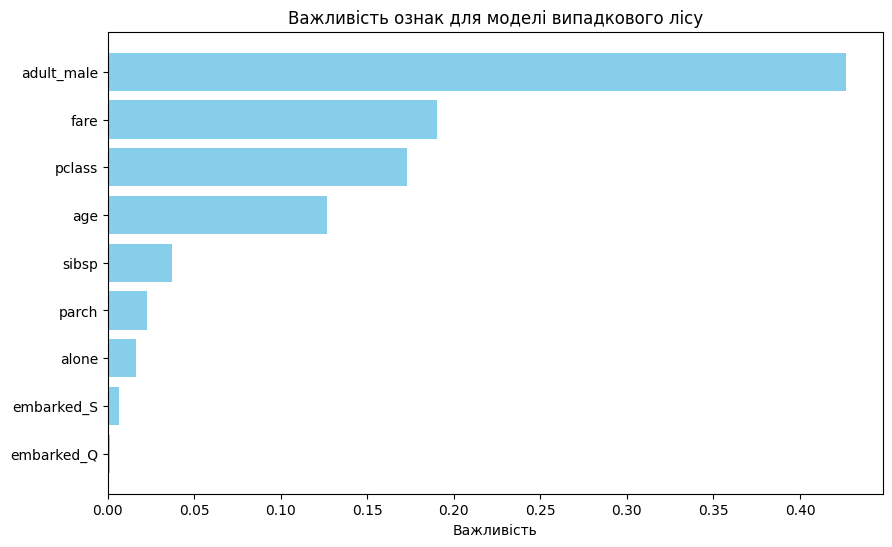

      Feature  Importance
5  adult_male    0.426573
4        fare    0.190379
0      pclass    0.172656
1         age    0.126746
2       sibsp    0.037104
3       parch    0.022830
6       alone    0.016012
8  embarked_S    0.006522
7  embarked_Q    0.001178


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Отримання важливості ознак
feature_importances = model_forest_optimized.feature_importances_
features = X.columns

# Створення DataFrame 
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортування важливостей
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Візуалізація важливості ознак
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важливість')
plt.title('Важливість ознак для моделі випадкового лісу')
plt.gca().invert_yaxis()  # 
plt.show()

# Виведення найбільш важливих ознак
print(importance_df.head(10))  
